In [8]:
using JLD
using DataFrames
using Statistics
using Plots
pyplot();

Plots.PyPlotBackend()

## ARX

In [120]:
# Signal lengths
NT = [25, 50, 100, 200, 400, 800, 1600, 3200]
NE = length(NT)

# Number of repetitions
num_repeats = 100

results_dict = Dict()
results_array = zeros(NE,5)
for (i,n) in enumerate(NT)

    RMS_FEM = load("results/results-ARX_FEM_M5_deg1_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-ARX_RLS_M5_deg1_S"*string(n)*".jld", "RMS")
    
    results_dict[n] = [mean(RMS_FEM); mean(RMS_RLS)]
    
    results_array[i,1] = n
    results_array[i,2] = mean(RMS_FEM)
    results_array[i,3] = std(RMS_FEM) / num_repeats
    results_array[i,4] = mean(RMS_RLS)
    results_array[i,5] = std(RMS_RLS) / num_repeats
    
end

df = DataFrame(results_dict)
sort!(df)

,25,50,100,200,400,800,1600,3200
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.034846,0.0336726,0.0334606,0.0330755,0.0337131,0.0337985,0.0336952,0.0332664
2,0.0387664,0.0366053,0.0342802,0.0334262,0.0338284,0.0338247,0.0337004,0.0332682


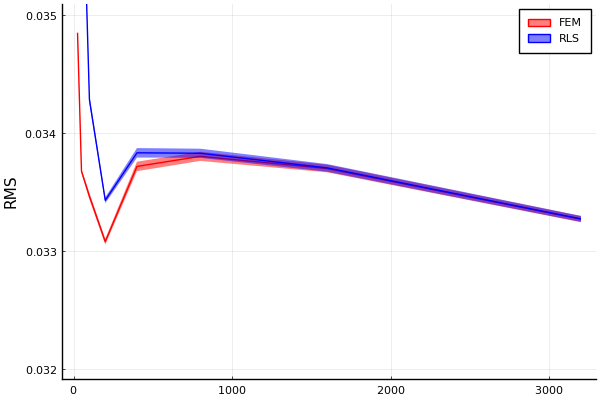

In [121]:
plot(results_array[:,1], 
     results_array[:,2], 
     ribbon=[results_array[:,3] results_array[:,3]], 
     color="red", 
     label="FEM", 
     ylabel="RMS",
#      xscale=:log10,
     ylims=[0.032, 0.035])
plot!(results_array[:,1], 
     results_array[:,4], 
     ribbon=[results_array[:,5] results_array[:,5]], 
     color="blue", 
     label="RLS")

In [122]:
savefig("figures/RMS-ARX.png")

## NARX

In [228]:
# Signal lengths
# NT = [50, 100, 200, 400, 800, 1600]
NT = [50, 100, 200, 400, 800]
NE = length(NT)

deg = 1

# Number of repetitions
num_repeats = 1000

results_dict = Dict()
results_array = zeros(NE,5)
for (i,n) in enumerate(NT)

    RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    
    # Filter outliers, infinities and NaNs
    RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
    RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
    
    results_dict[n] = [mean(RMS_FEM); mean(RMS_RLS)]
    
    results_array[i,1] = n
    results_array[i,2] = mean(RMS_FEM)
    results_array[i,3] = std(RMS_FEM) / sqrt(num_repeats)
    results_array[i,4] = mean(RMS_RLS)
    results_array[i,5] = std(RMS_RLS) / sqrt(num_repeats)
    
end

df = DataFrame(results_dict)

,50,100,200,400,800
,Float64,Float64,Float64,Float64,Float64
1,0.0272009,0.0254738,0.0240839,0.0241766,0.0272041
2,0.028413,0.0259917,0.0246667,0.0245399,0.0282226


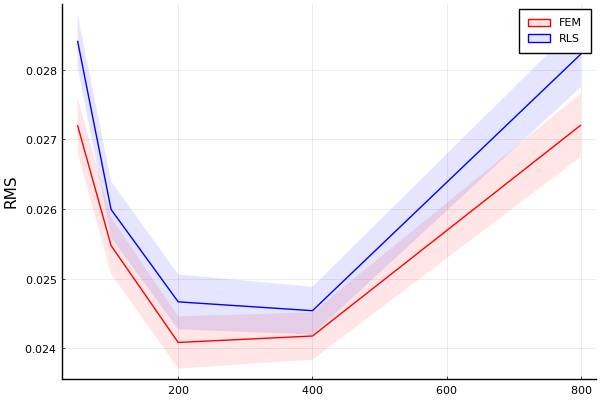

In [229]:
p2 = plot(results_array[:,1], 
          results_array[:,2], 
          ribbon=[results_array[:,3] results_array[:,3]], 
          color="red", 
          label="FEM", 
#      xscale=:log10,
#           ylims=[0.032, 0.035],
          fillalpha=0.1,
          ylabel="RMS",)
plot!(results_array[:,1], 
     results_array[:,4], 
     ribbon=[results_array[:,5] results_array[:,5]], 
     color="blue", 
     fillalpha=0.1,
     label="RLS")

In [126]:
savefig(p2, "figures/RMS-NARX.png")

## Comparing multiple degrees

In [247]:
# Signal lengths
# NT = [50, 100, 200, 400, 800, 1600, 3200]
NT = [50, 100, 200, 400, 800]
NE = length(NT)

deg = [1,2,3]
ND = length(deg)

# Number of repetitions
num_repeats = 100

results_dict1 = Dict()
results_dict2 = Dict()
results_array = zeros(5, NE, ND)
for d in deg
    for (i,n) in enumerate(NT)

        RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")

        # Filter outliers, infinities and NaNs
        RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
        RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))

        results_array[1,i,d] = n
        results_array[2,i,d] = mean(RMS_FEM)
        results_array[3,i,d] = std(RMS_FEM) / sqrt(num_repeats)
        results_array[4,i,d] = mean(RMS_RLS)
        results_array[5,i,d] = std(RMS_RLS) / sqrt(num_repeats)
        
        if d == 1
            results_dict1[n] = [mean(RMS_FEM); mean(RMS_RLS)]
        elseif d == 2
            results_dict2[n] = [mean(RMS_FEM); mean(RMS_RLS)]
        end
    end
end

DataFrame(results_dict2)

,50,100,200,400,800
,Float64,Float64,Float64,Float64,Float64
1,0.0120339,0.0114793,0.0113045,0.0112759,0.0114033
2,0.0173067,0.0135329,0.0120422,0.0116985,0.0117604


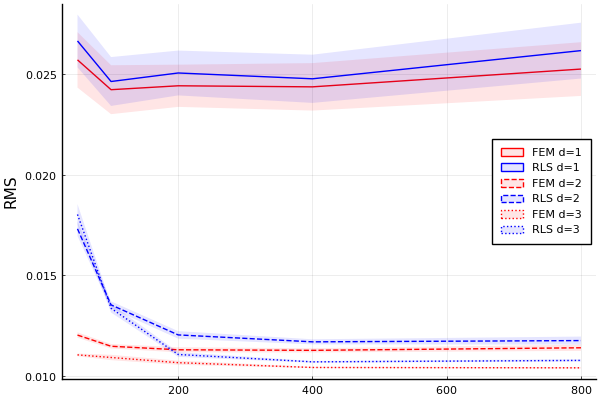

In [249]:
alpha = 0.1

# Degree 1
deg = 1
p3 = plot(results_array[1,:,deg], 
          results_array[2,:,deg], 
          ribbon=[results_array[3,:,deg] results_array[3,:,deg]], 
          color="red", 
          label="FEM d=1", 
          fillalpha=alpha,
#           ylims=[0.0318, 0.034],
          ylabel="RMS")
plot!(results_array[1,:,deg], 
      results_array[4,:,deg], 
      ribbon=[results_array[5,:,deg] results_array[5,:,deg]], 
      color="blue", 
      fillalpha=alpha,
      label="RLS d=1")

# Degree 2
deg = 2
plot!(results_array[1,:,deg], 
     results_array[2,:,deg], 
     ribbon=[results_array[3,:,deg] results_array[3,:,deg]], 
     color="red", 
     fillalpha=alpha,
     linestyle=:dash,
     label="FEM d=2")
plot!(results_array[1,:,deg], 
      results_array[4,:,deg], 
      ribbon=[results_array[5,:,deg] results_array[5,:,deg]], 
      color="blue", 
      fillalpha=alpha,
      linestyle=:dash,
      label="RLS d=2")

# Degree 3
deg = 3
plot!(results_array[1,:,deg], 
     results_array[2,:,deg], 
     ribbon=[results_array[3,:,deg] results_array[3,:,deg]], 
     color="red", 
     fillalpha=alpha,
     linestyle=:dot,
     label="FEM d=3")
plot!(results_array[1,:,deg], 
      results_array[4,:,deg], 
      ribbon=[results_array[5,:,deg] results_array[5,:,deg]], 
      color="blue", 
      fillalpha=alpha,
      linestyle=:dot,
      label="RLS d=3")

In [250]:
savefig(p3, "figures/RMS-NARX_all-degrees.png")